**Netflix - Data Analysis & Visualisation**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Data Exploration**
\
\
Get an idea of the data we're working with and check for datatypes, duplicates and possible null values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.shape

(8807, 12)

In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
#Some info on the dataframe with columns that contain strings
df.describe(include = ['O'])

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


<Axes: >

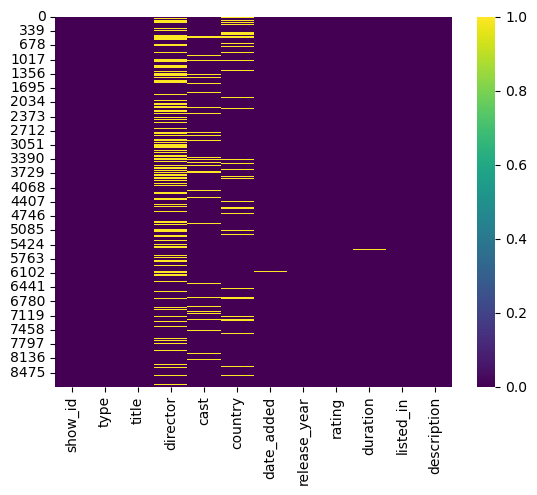

In [8]:
#Get an idea of where null values are present
sns.heatmap(df.isnull(), cmap = 'viridis')

In [9]:
# Number of missing values per column
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
#Checking for duplicates
df.duplicated().sum()

0

In [11]:
#Verifying that no titles were duplicated
df['title'].nunique()

8807

**Data Cleaning**
\
\
Some of the columns need to have their datatypes transformed, missing values will need to be replaced and remove some rows. 

In [12]:
#Will set the 'data_added' datatype to datetime 
df['date_added'] = pd.to_datetime(df['date_added'])

In [13]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [14]:
#Removing rows with values missing in these rows since there aren't many in these columns
df.dropna(subset = ['date_added','rating','duration'],inplace = True)

In [15]:
df.shape

(8790, 12)

In [16]:
#Replacing missing values
df['director'].replace(np.nan, 'Not Given', inplace = True)
df['cast'].replace(np.nan , 'Not Given', inplace = True)
df['country'].replace(np.nan, 'Not Given', inplace = True)

In [17]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

**Data Visualisation**

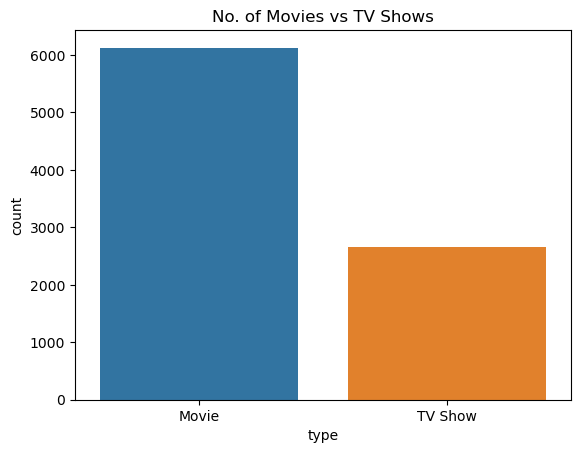

In [18]:
#Comparison of content types
sns.countplot(x = 'type', data = df)
plt.title('No. of Movies vs TV Shows')
plt.show()

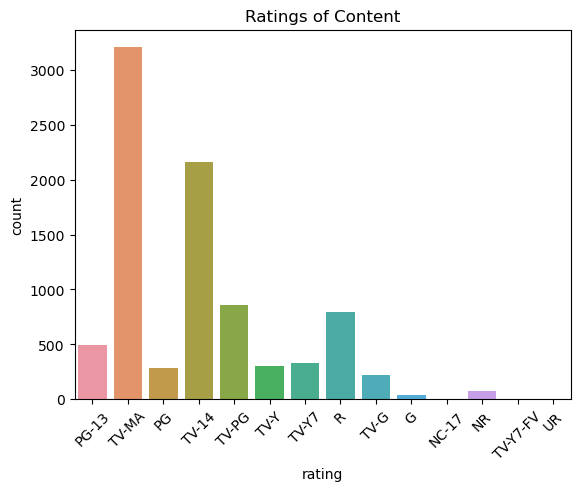

In [19]:
#Comparison between ratings
sns.countplot(x = 'rating', data = df)
plt.title('Ratings of Content')
plt.xticks(rotation = 45)
plt.show()

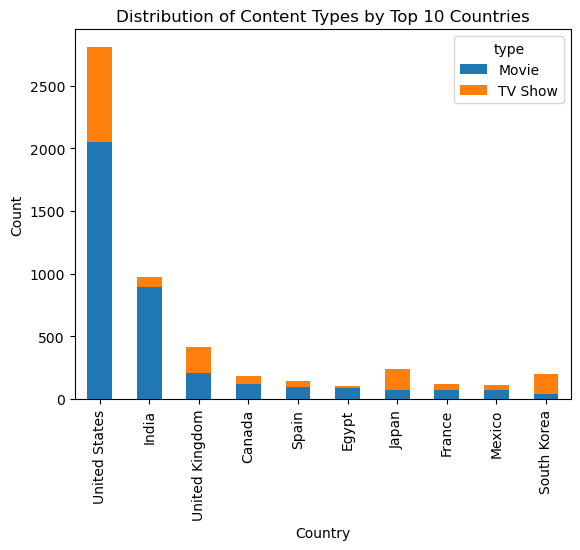

In [20]:
#Top 10 Countries
filt = df['country'] != 'Not Given' #Just to avoid the Not Given rows
top_10 = df[filt]['country'].value_counts()[:10].index #The index here are countries
countries = df.loc[df['country'].isin(top_10)]
result = countries.groupby(['type','country']).size().reset_index(name = 'count')
stacked_df = result.pivot_table(index='country', columns='type', values='count').sort_values(by = 'Movie', ascending = False) #To separate the type column into TV Show and Movie columns

stacked_df.plot(kind = 'bar', stacked = 'True')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Content Types by Top 10 Countries')
plt.show()

In [21]:
top_10

Index(['United States', 'India', 'United Kingdom', 'Japan', 'South Korea',
       'Canada', 'Spain', 'France', 'Mexico', 'Egypt'],
      dtype='object')

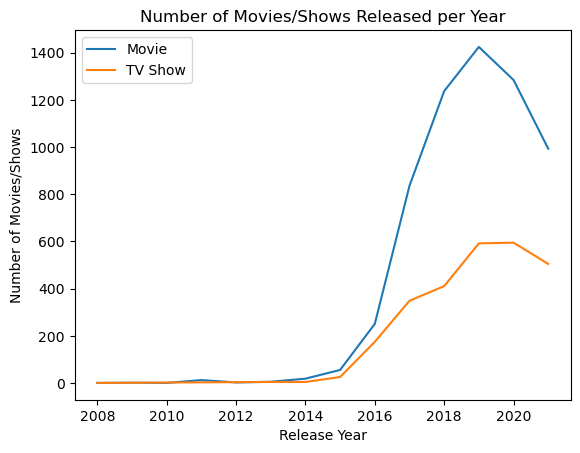

In [22]:
#Content added over the years
movie_count = df[df['type'] == 'Movie']['date_added'].dt.year.value_counts().sort_index() # Extracts the year and counts the frequency
tv_count = df[df['type'] == 'TV Show']['date_added'].dt.year.value_counts().sort_index()

plt.plot(movie_count.index, movie_count.values, label='Movie')
plt.plot(tv_count.index, tv_count.values, label='TV Show')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies/Shows')
plt.title('Number of Movies/Shows Released per Year')
plt.legend()
plt.show()